In [1]:
import pandas as pd

In [2]:
glass=pd.read_csv("glass.csv")
print(glass.shape)
glass.head(6)

(214, 11)


,id,ri,na,mg,al,si,k,ca,ba,fe,glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [3]:
import seaborn as sns  
import matplotlib.pyplot as plt

# 使用三种方法绘制散裂图
sns.set(font_scale=1.5)  
sns.lmplot(x='al', y='ri', data=glass, ci=None)

glass.plot(kind='scatter', x='al', y='ri')  
plt.show()

plt.scatter(glass.al, glass.ri)  
plt.xlabel('al')
plt.ylabel('ri')
plt.show() 

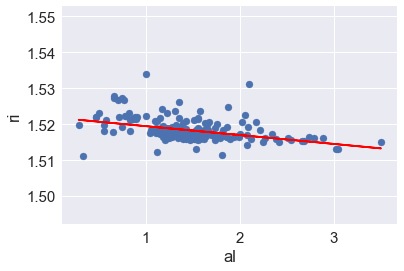

In [4]:
#拟合线性回归模型  
from sklearn.linear_model import LinearRegression  

feature_cols = ['al']
X = glass[feature_cols]
y = glass.ri

linreg = LinearRegression()
linreg.fit(X, y)

glass['ri_pred'] = linreg.predict(X)

plt.scatter(glass.al, glass.ri)  
plt.plot(glass.al, glass.ri_pred, color='red')  
plt.xlabel('al')  
plt.ylabel('ri')
plt.show() 

In [5]:
#检查glass_type  
sort = glass.glass_type.value_counts().sort_index()  
print('>> Glass_Type\n', sort, sep='')  
  
#类型1、2、3的窗户玻璃  
#类型5，6，7是家用玻璃  
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})

>> Glass_Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: glass_type, dtype: int64


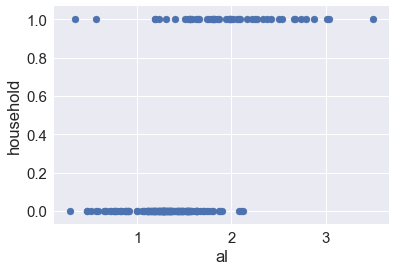

In [6]:
# 绘制 AL-GlassType 之间的关系
plt.scatter(glass.al, glass.household)  
plt.xlabel('al')  
plt.ylabel('household')  
plt.show()

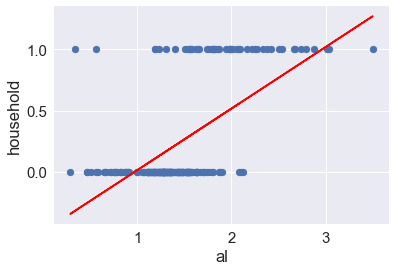

In [7]:
#拟合线性回归模型并存储预测  
feature_cols = ['al']  
X = glass[feature_cols]  
y = glass.household  
linreg.fit(X, y)  
glass['household_pred'] = linreg.predict(X)  
  
#包括回归线的散点图  
plt.scatter(glass.al, glass.household)  
plt.plot(glass.al, glass.household_pred, color='red')  
plt.xlabel('al')  
plt.ylabel('household')  
plt.show()  

In [8]:
#拟合Logistic回归模型，存储类预测  
import numpy as np  

#将household_pred转换为 1或 0     
glass['household_pred_class'] = np.where(glass.household_pred >= 0.5, 1, 0)  
glass.head()

,id,ri,na,mg,al,si,k,ca,ba,fe,glass_type,ri_pred,household,household_pred,household_pred_class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,1.519220,0,0.065459,0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,1.518576,0,0.195765,0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,1.518130,0,0.285976,0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,1.518749,0,0.160682,0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,1.518873,0,0.135623,0


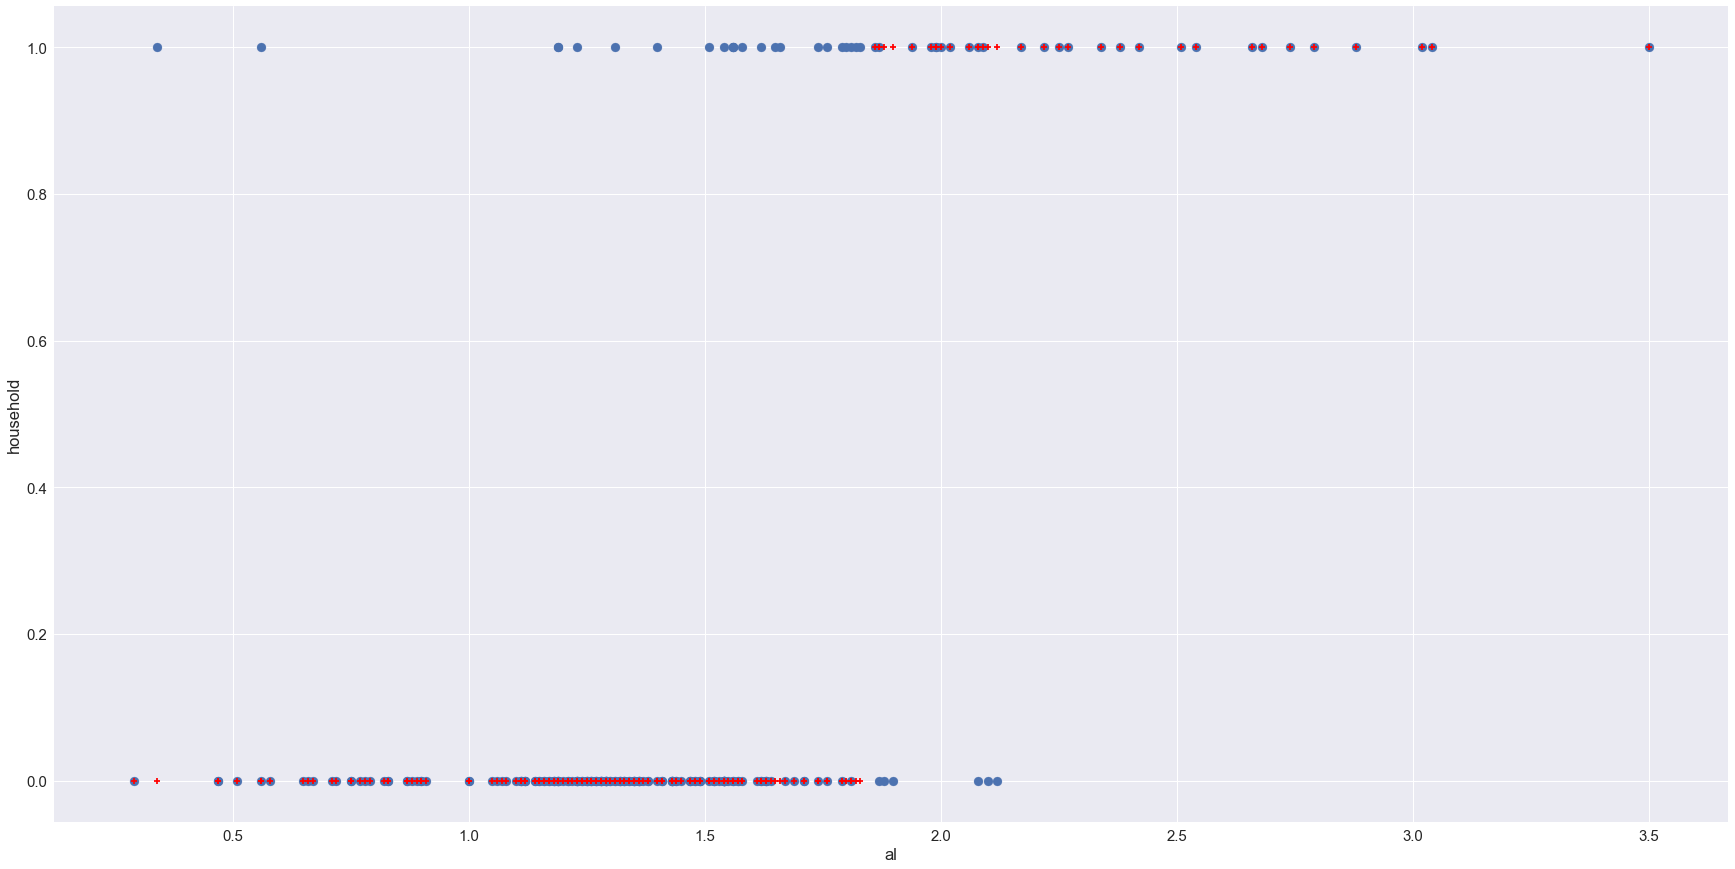

In [9]:
from sklearn.linear_model import LogisticRegression  
feature_cols = ['al']  
X = glass[feature_cols]  
y = glass.household    # Glass-Type
logreg = LogisticRegression(C=1e9) 
logreg.fit(X, y)  
glass['household_pred_class'] = logreg.predict(X)  

#绘图-显示预测结果
fig, ax = plt.subplots(figsize=(30,15))
ax.scatter(glass.al, glass.household, s = 80)  
ax.scatter(glass.al, glass.household_pred_class, color='red', marker='+', s = 45)  
ax.set_xlabel('al')  
ax.set_ylabel('household')  
plt.show()

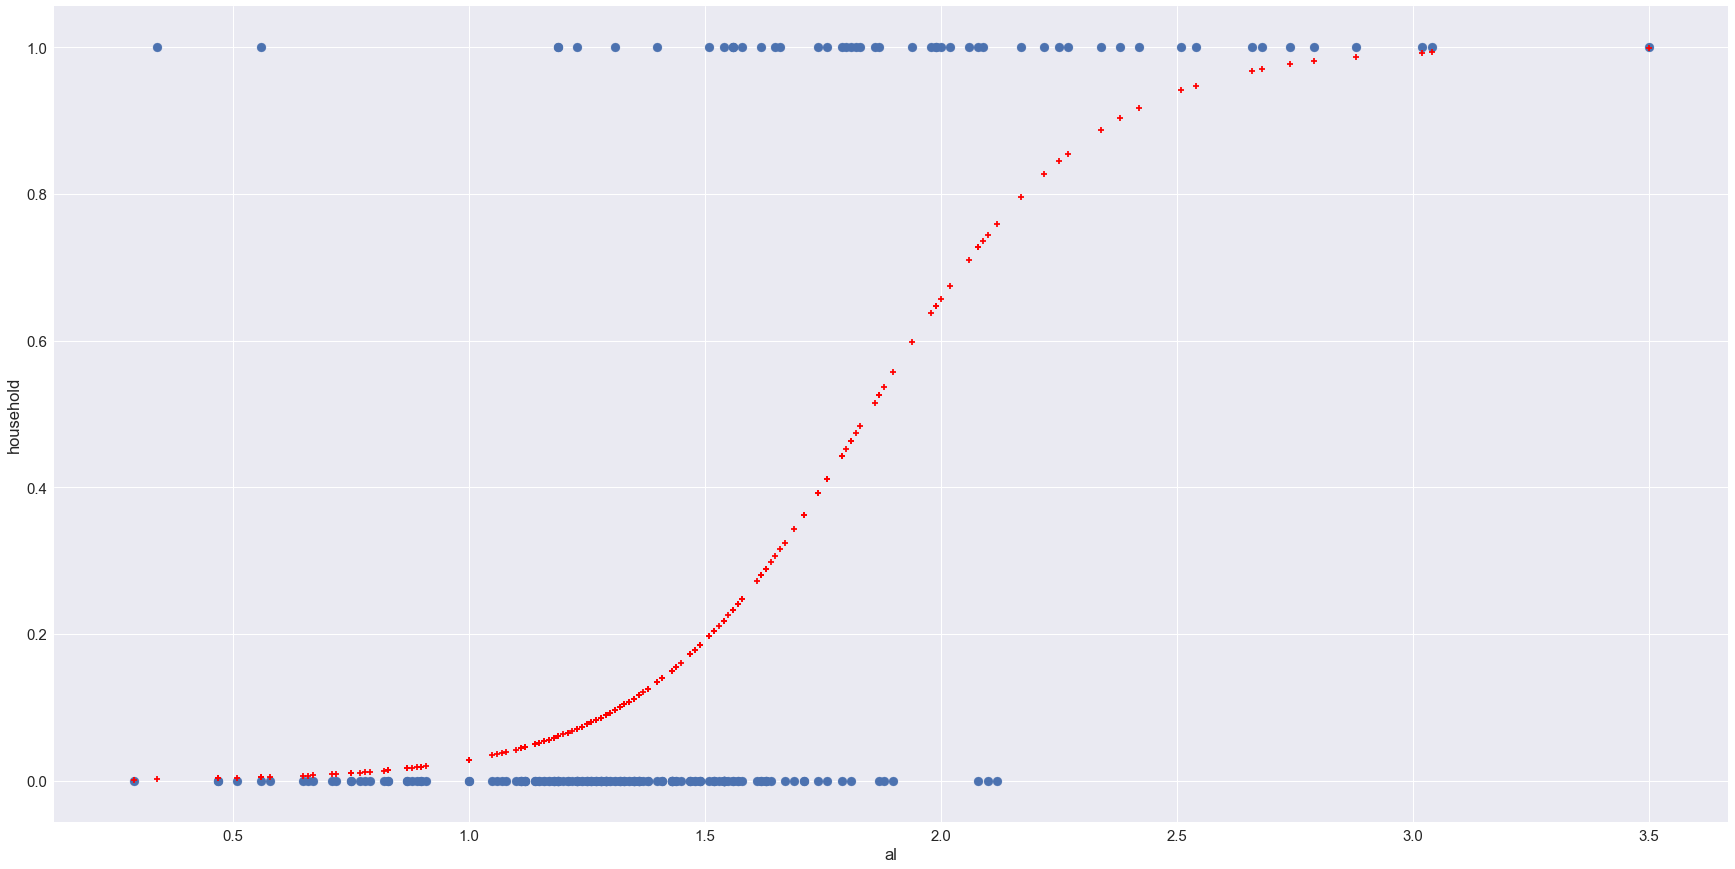

In [10]:
glass['household_pred_prob'] = logreg.predict_proba(X)[:, 1]  
#绘图 绘制预测概率  
  
fig, ax = plt.subplots(figsize=(30,15))
ax.scatter(glass.al, glass.household, s = 80)  
ax.scatter(glass.al, glass.household_pred_prob, color='red', marker='+', s = 45)  
ax.set_xlabel('al')  
ax.set_ylabel('household')  
plt.show()

In [11]:
#检查一些例子的预测  
print(logreg.predict_proba(1))  
print(logreg.predict_proba(2))  
print(logreg.predict_proba(3))  

[[0.97161726 0.02838274]]
[[0.34361555 0.65638445]]
[[0.00794192 0.99205808]]
